### Forecast with mostly updated data
Since we aim to make accurate forecast on COVID-19 infection situation, we apply the FB Prophet method to the mostly updated US data provided by JHU. This prediction is built on daily increase in new confirmed cases from Jan. 22 to Dec. 9.  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import warnings
import math as m

In [19]:
dt = pd.read_csv('data/time_series_covid19_confirmed_US_updated.csv')
d = dt.loc[:,'1/22/20':] # Take sample from Jan.22 to Dec.9
d = d.transpose()
d = d.sum(axis=1)
d = d.to_list()  # convert d into numerical list
# Create a new data set with all content that we need
data = pd.DataFrame(columns=['ds','confirm'])
date = list(dt.columns[11:])
date = list(pd.to_datetime(date))
# Check whether they have equal length
len(date) == len(d)
# Take a look at the data set
data['ds'] = date
data['confirm'] = d
data = data.set_index('ds')
data['confirm'] = data['confirm']/1000
data.head(3)

,confirm
ds,
2020-01-22,0.001
2020-01-23,0.001
2020-01-24,0.002


In [20]:
data = data.diff()
data = data.loc['2020-01-23':'2020-12-9',] # set start as 23rd because of diff
data.head(3)

,confirm
ds,
2020-01-23,0.000
2020-01-24,0.001
2020-01-25,0.000


In [13]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [21]:
data.reset_index(inplace=True)
data['cap'] = data['confirm'].max()
data.rename(columns={'confirm':'y'}, inplace = True)
n = Prophet(growth='logistic',
            weekly_seasonality=True,
            daily_seasonality='auto')
n.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast = n.make_future_dataframe(periods=20)
forecast['cap'] = data['y'].max()
prophet_forecast = n.predict(forecast)
enddate = '2020-12-9'
prophet_forecast.set_index('ds',inplace=True)
data.set_index('ds',inplace=True)
prophet_fit_forecast = prophet_forecast.yhat.loc[prophet_forecast.index>=enddate]

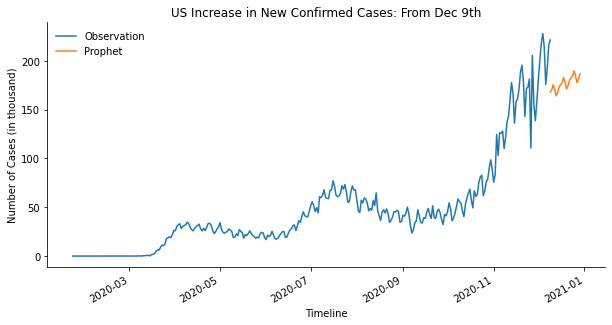

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['y'], label='Observation')
ax.plot(prophet_fit_forecast, label='Prophet')

ax.set_xlabel('Timeline')
ax.set_ylabel('Number of Cases (in thousand)')
ax.set_title('US Increase in New Confirmed Cases: From Dec 9th')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

fig.autofmt_xdate()

plt.savefig('20-periods Forecast with Logistic and Seasonality_Updated.svg', 
            bbox_inches = 'tight', transparent = False)

In [35]:
print('We predict daily increase in new confirmed cases to reach {:.0f} thousand in the following days.'.format(prophet_fit_forecast.max()))

We predict daily increase in new confirmed cases to reach 190 in the following days.


In [39]:
forecast = n.make_future_dataframe(periods=90)
forecast['cap'] = data.max()['y']
prophet_forecast = n.predict(forecast)
enddate = '2020-12-9'
prophet_forecast.set_index('ds',inplace=True)
prophet_fit_forecast = prophet_forecast.yhat.loc[prophet_forecast.index>=enddate]

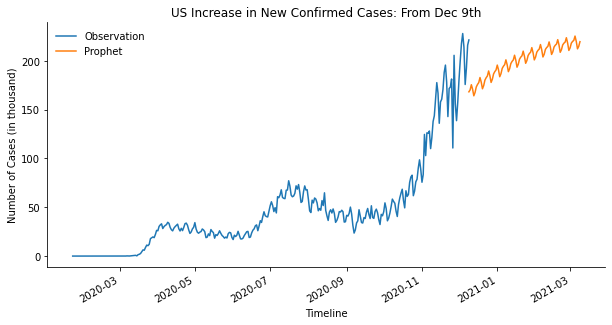

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data['y'], label='Observation')
ax.plot(prophet_fit_forecast, label='Prophet')

ax.set_xlabel('Timeline')
ax.set_ylabel('Number of Cases (in thousand)')
ax.set_title('US Increase in New Confirmed Cases: From Dec 9th')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(frameon=False)

fig.autofmt_xdate()

plt.savefig('20-periods Forecast with Logistic and Seasonality_Updated_l.svg', 
            bbox_inches = 'tight', transparent = False)